Done. You have the matrices PP QQ  RR  SS  WW.
  
Done. You have the matrices "Response" and "Response_named" 
which contain the models simulated reponses to
given values for the exogenous stochastic processes.
  
  
Here are the UNFILTERED SIMULATED series.
Total Simulation Length =  500
Number of Initial Values Discarded =  100
  
Trend and cycle components have been computed.
The matrices Mat_trend, Mat_trend_named,
Mat_cycle, Mat_cycle_named can be downloaded
to excel or used to make plots.
  
Detrending Filter Used:  Hodrick-Prescott
  
  
Simulated Series, Trend Component, Cyclical Comoponent
x-axis: time periods,  y-axis:  %-deviation from steady state
  


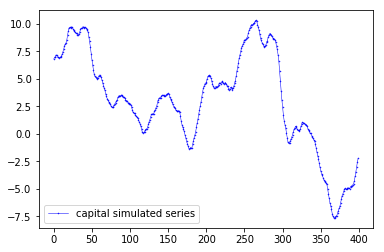

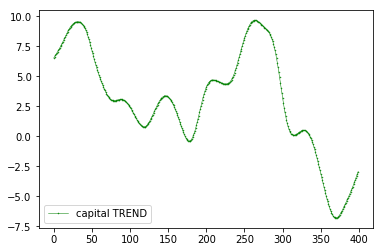

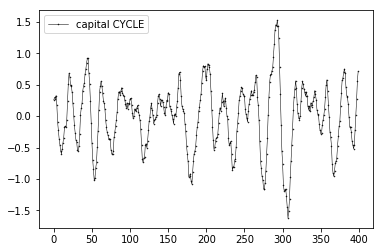

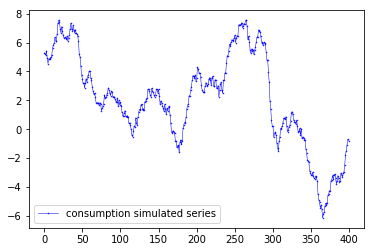

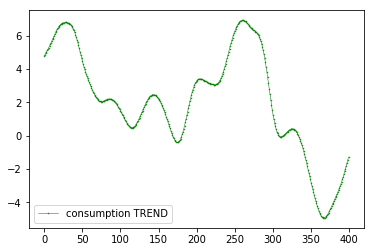

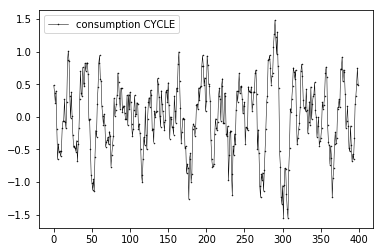

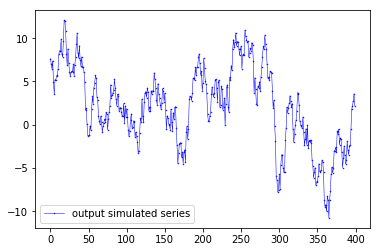

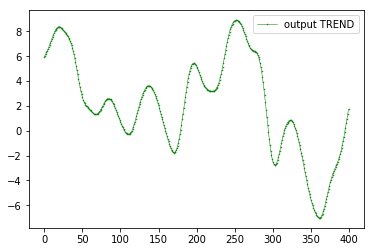

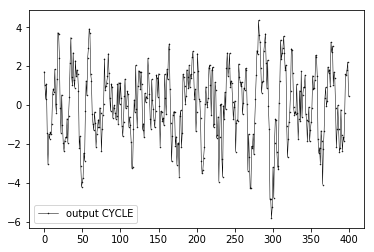

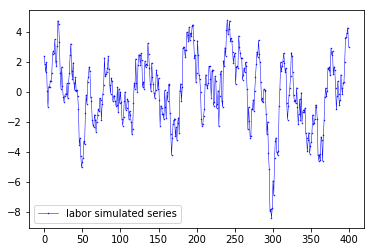

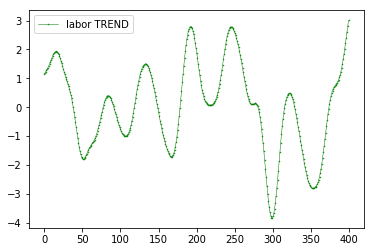

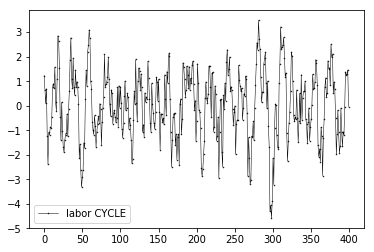

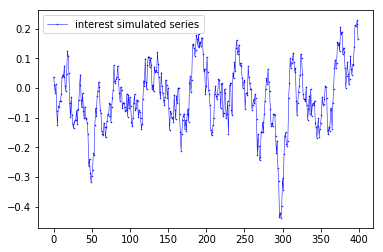

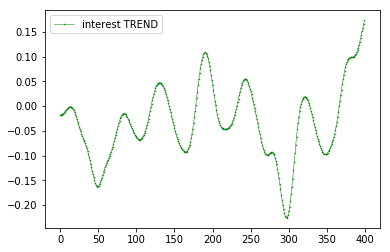

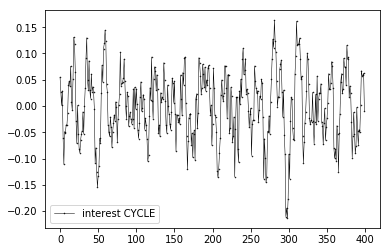

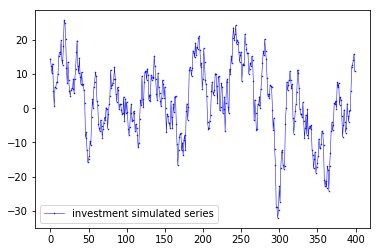

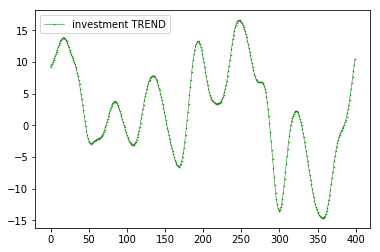

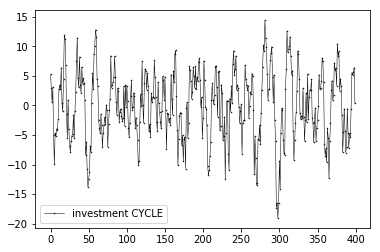

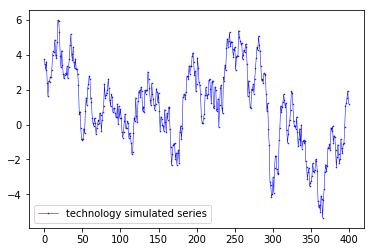

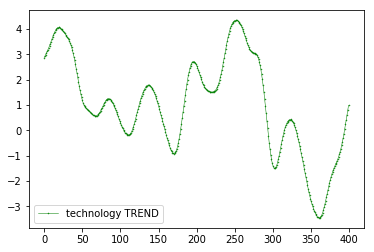

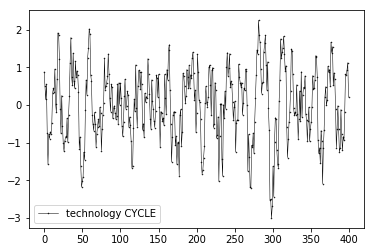

  
  
Shocks used in simulation
  


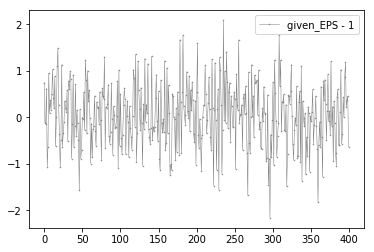

   
   
Mat_trend_named = 
[['capital' '6.543960242933336' '6.6460146747055' ... '-3.2961429113356497' '-3.112462494665683' '-2.928336758441405']
 ['consumption' '4.7889350553113275' '4.869733124019065' ... '-1.6274631687554555' '-1.4512342277932206' '-1.2747041851062073']
 ['output' '5.930338975870018' '6.053756169297953' ... '0.9831134621356433' '1.3611099693295887' '1.7393846244953521']
 ...
 ['interest' '-0.018879440346656874' '-0.01801076470885213' ... '0.15879454751587646' '0.16621885494267064' '0.1736371618339239']
 ['investment' '9.227728079706523' '9.47426718899287' ... '8.524779284710831' '9.485659872129695' '10.446752296678488']
 ['technology' '2.8687880208266425' '2.9295230837112136' ... '0.6080720713324204' '0.7979865415591846' '0.9880313798977309']]
   
Mat_cycle_named = 
[['capital' '0.2609323043683691' '0.2981712854402634' ... '0.2735744333417718' '0.5632647878363999' '0.712511286897056']
 ['consumption' '0.4829549208606325' '0.3660496614805986' ... '0.5102881371643981'

,0,1,2,3
0,Variables,Mean,Std Deviation,Coeff of Variation
1,capital,1.2217449274487535e-14,0.5214343996346789,42679481446551.83
2,consumption,4.6710968426566525e-14,0.5384719842741417,11527741821937.686
3,output,7.19402315496609e-14,1.8323054994823635,25469830441364.496
4,labor,1.5838441669302483e-14,1.3917366180169217,87870804910961.48
5,interest,8.53345172302511e-16,0.06445651808004753,75533934182963.52
6,investment,9.032774528350274e-14,5.829174643671858,64533600671381.82
7,technology,3.2938096694579145e-14,0.9419137281744101,28596483182023.918


 
 
Table 02:  Cross Correlation with Output, Standard Deviation Relative to Output
 


,0,1,2
0,Variables,Correlation with GDP,Std Dev Relative to GDP
1,capital,0.3628730388455992,0.2845783084654753
2,consumption,0.8667577490427029,0.29387674949742987
3,output,1.0,1.0
4,labor,0.9812062977951619,0.7595548986837047
5,interest,0.9604010521108993,0.035177822747493176
6,investment,0.991103691917398,3.181333377713832
7,technology,0.9998782975827257,0.5140593249545482


 
  
Table 03:  Autocorrelations  (Not Cross Autocorrelations)
 


,0,1,2,3,4,5,6,7
0,leads (+t) lags (-t),capital,consumption,output,labor,interest,investment,technology
1,5.0,0.9595549832537046,0.8372995400736208,0.7383073428889889,0.7261317068028603,0.7264267585694623,0.7280717103902582,0.7367023275041837
2,4.0,0.8599561689610135,0.6674010036289741,0.5125001754109901,0.4938302745114256,0.49450433686022155,0.49673083699761134,0.5100132932584601
3,3.0,0.7207769699153416,0.5199941250038825,0.3601760361282479,0.3414252994369561,0.3424184764772399,0.34423395511070465,0.35764243503489135
4,2.0,0.5551667363591433,0.35806254529050396,0.20372721380909004,0.1863599143113015,0.1877539220758139,0.1888051543672411,0.20132690019555677
5,1.0,0.37610784355260873,0.19460996592599075,0.05600999355320135,0.04135530319112631,0.043174408763413115,0.0432081536097686,0.05391263524546977
6,0.0,1.0,0.9999999999999998,1.0,0.9999999999999999,1.0,1.0,1.0
7,-1.0,0.9595549832537046,0.837299540073621,0.7383073428889889,0.7261317068028602,0.7264267585694623,0.7280717103902583,0.7367023275041837
8,-2.0,0.8599561689610135,0.6674010036289741,0.5125001754109901,0.4938302745114256,0.49450433686022155,0.4967308369976114,0.5100132932584601
9,-3.0,0.7207769699153416,0.5199941250038824,0.36017603612824795,0.34142529943695615,0.3424184764772399,0.3442339551107047,0.35764243503489135


 
 
  
Table 04:  Cross Autocorrelation with Output
 


,0,1,2,3,4,5,6,7
0,leads (+t) lags (-t),capital,consumption,output,labor,interest,investment,technology
1,5.0,0.08659642710047175,0.5432917441436642,0.7383073428889889,0.7619629458564461,0.7633082889989337,0.7576111767193604,0.7412471394966986
2,4.0,-0.13075273586662672,0.27525722186562585,0.5125001754109901,0.5681088564830061,0.5864190667893981,0.5529378356829365,0.5177126239063023
3,3.0,-0.29451396253855355,0.08489290509430159,0.3601760361282479,0.44110864541360145,0.4725260406491006,0.41747164662309716,0.36722653378427184
4,2.0,-0.42390655711773007,-0.08992382268903076,0.20372721380909004,0.3028072239713024,0.34421610185555607,0.2729070167439769,0.21202711501050175
5,1.0,-0.514324319755386,-0.23781709761205622,0.05600999355320135,0.16569480581044044,0.21366644147688876,0.13189775904484155,0.06495851813362341
6,0.0,0.3628730388455992,0.8667577490427029,1.0,0.9812062977951619,0.9604010521108993,0.991103691917398,0.9998782975827257
7,-1.0,0.5471189226715552,0.7895277472835052,0.7383073428889889,0.6664482803199873,0.6253400823179237,0.6917494407014093,0.7335309525248715
8,-2.0,0.6535282694139015,0.6947937436644549,0.5125001754109901,0.4058523681274548,0.3521314887689685,0.4410239704045086,0.5045938297475727
9,-3.0,0.7102006803751331,0.6226756351253313,0.36017603612824795,0.23328125716834097,0.17248145781639332,0.27411150663358474,0.35041837997038633


In [329]:
#  Uhlig's Exampl1.m
#  G. Hansen Indivisible Labor and Business Cycle (JME, 1985)
#  Benchmark Real Business Cycle Model 

import numpy as np

N_bar     = 1.0/3
Z_bar     = 1
rho       = .36
delta     = .025
R_bar     = 1.01
eta       = 1.0
psi       = .95
sigma_sigma = .712

betta   = 1.0/R_bar
YK_bar  = (R_bar + delta - 1)/rho
K_bar   = (YK_bar / Z_bar)**(1.0/(rho-1)) * N_bar
I_bar   = delta * K_bar
Y_bar   = YK_bar * K_bar
C_bar   = Y_bar - delta*K_bar
A       =  C_bar**(-eta) * (1 - rho) * Y_bar/N_bar    

VARNAMES = ['capital',
                         'consumption',
                         'output',
                         'labor',
                         'interest',
                         'investment',
                         'technology']

AA = np.vstack(([0],
                          [- K_bar],
                          [0],
                          [0],
                          [0]))


BB = np.vstack(([0],
           [(1-delta)*K_bar],
           [rho],
           [0],
           [- rho * YK_bar ]))

CC = np.vstack(([ -C_bar, Y_bar, 0, 0, -I_bar],
           [0,           0,          0,        0,        I_bar],  
           [0,           -1,         1-rho,    0,        0],      
           [-eta,        1,          -1,       0,        0],      
           [0, rho*YK_bar, 0, - R_bar, 0 ]))

DD = np.vstack(([0],
                           [0],
                           [1],
                           [0],
                           [0]))

FF = [ 0 ]

GG = [ 0 ]

HH = [ 0 ]

JJ = np.matrix([ -eta,  0,  0,  1,  0])

KK = np.matrix([ eta,   0,  0,  0,  0])

LL = [ 0 ]

MM = [ 0 ]

NN = [psi]

Sigma = [sigma_sigma**2]

Sigma_EPS = Sigma


%run Uhlig_solver_abreviated.ipynb

#print(' ')
#print('PP')
#print(PP.shape)
#print(PP)
#print(' ')
#print('RR')
#print(RR.shape)
#print(RR)
#print(' ')
#print('QQ')
#print(QQ.shape)
#print(QQ)
#print(' ')
#print('SS')
#print(SS.shape)
#print(SS)
#print(' ')


%run Uhlig_simul_rand.ipynb

%run Detrend_Filters.ipynb

##  USER INPUT:  Remember to set
##  output_index  in the Calc_Moments.ipynb
## This is different for each model

output_index = 2

%run Calc_Moments.ipynb

